# kmp字符串匹配  
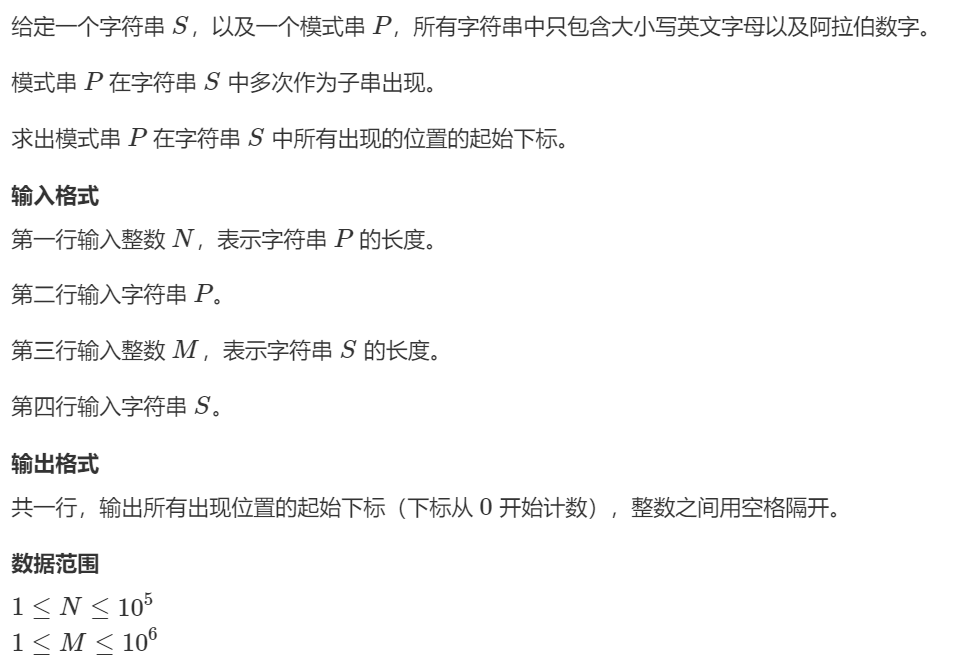  

**这里的字符串都从下标1开始进行存储，便于计算，同时next数组的含义：next[j]表示从字符串1-j位置的前缀相等的字符个数**  
```c
#include <iostream>
#include <cstring>
using namespace std;
const int N = 100010, M = 1000010;
char p[N], s[M];
int n, m, ne[N];

int main()
{
    cin >> n >> p + 1 >> m >> s + 1;
    memset(ne, 0, sizeof(ne));
    //求next数组， next[1] = 0
    for(int i = 2, j = 0;i <= n;i++)
    {
        //当j没有退回起点即j!=0，且当前字符不匹配时，则j进行回退
        while(j && p[j + 1] != p[i]) j = ne[j];
        //如果当前字符匹配成功则i、j同时前进
        if(p[j+1] == p[i]) j++;
        ne[i] = j;
    }

    //kmp匹配过程
    for(int i = 1, j = 0;i <= m;i++)
    {
        while(j && p[j + 1] != s[i]) j = ne[j];
        if(p[j + 1] == s[i]) j++;
        if(j == n)
        {
            //匹配成功
            cout << i - j << " ";
            //匹配下一个位置
            j = ne[j];
        }
    }
    return 0;
}
```

# Trie数组  
用于高效地存储和查找字符串  
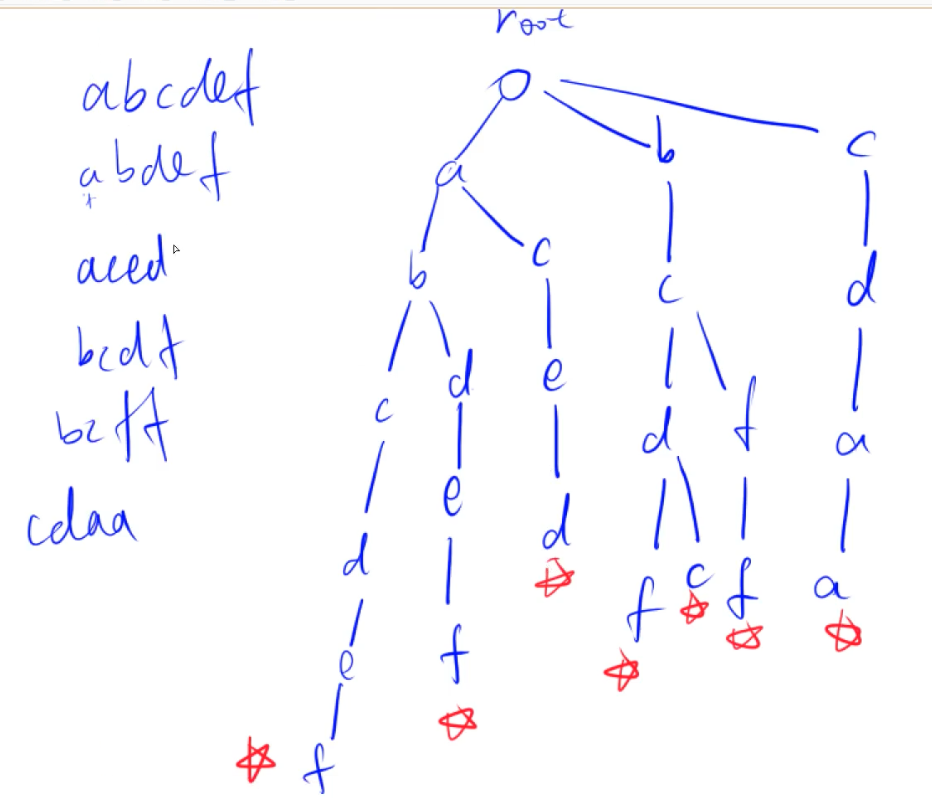

## Trie字符串统计  
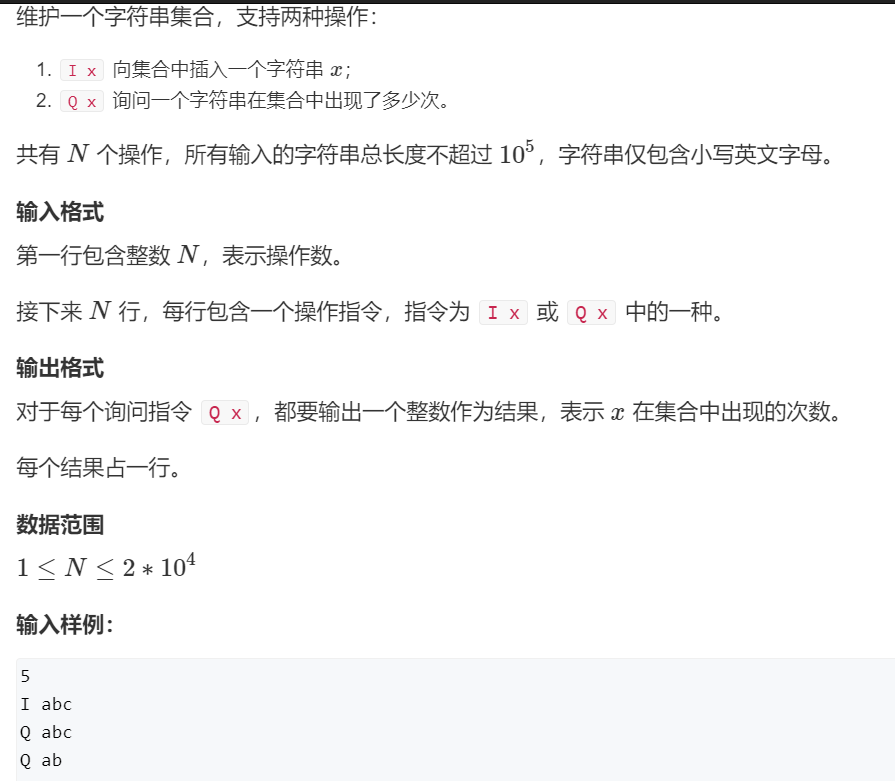

```c
#include <iostream>

using namespace std;
const int N = 100010;

int tr[N][26], cnt[N];
int idx = 0;

void insert(char* str)
{
    //插入字符串
    int p = 0;
    for(int i = 0;str[i];i++)
    {
        int k = str[i] - 'a';
        if(!tr[p][k]) tr[p][k] = ++idx;
        p = tr[p][k];
    }
    cnt[p]++;
}

int query(char* str)
{
    int p = 0;
    for(int i = 0;str[i];i++)
    {
        int k = str[i] - 'a';
        if(!tr[p][k]) return 0;
        p = tr[p][k];
    }
    return cnt[p];
}

int main()
{
    char op[2], str[N];
    int n;
    cin >> n;
    while(n--)
    {
        cin >> op;
        if(op[0] == 'I')
        {
            cin >> str;
            insert(str);
        }else
        {
            cin >> str;
            int res = query(str);
            cout << res << endl;
        }
    }
    return 0;
}
```